In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.utils
import torch.distributions
import numpy as np
import matplotlib.pyplot as plt
import mnist
import scipy.misc
from  tqdm import tqdm
import os

In [2]:
plt.rcParams.update({'figure.max_open_warning': 0})
if not os.path.exists("images"):
    os.mkdir("images")

In [3]:
class Encoder(nn.Module):
    def __init__(self,x):
        super(Encoder, self).__init__()
        self.l1=nn.Linear(784,512)
        self.l2=nn.Linear(512,x)
    
    def forward(self,x):
        
        x=torch.flatten(x)
        x = x.to(torch.float32)

#         print(x.shape)
        ans=self.l1(x)
        ans=F.relu(ans)
        ans=self.l2(ans)
        return ans
        
        
        

In [4]:
class Decoder(nn.Module):
    def __init__(self,x):
        super(Decoder, self).__init__()
        self.l1=nn.Linear(x,512)
        self.l2=nn.Linear(512,784)
                
    def forward(self,x):
#         x = torch.from_numpy(x)
#         x=torch.flatten(x)
#         x = x.to(torch.float32)

#         print(x.shape)
        ans=self.l1(x)
        ans=F.relu(ans)
        ans=self.l2(ans)
        ans = torch.sigmoid(ans)
        return ans

        

In [5]:
class Autoencoder(nn.Module):
    def __init__(self,x):
        super(Autoencoder, self).__init__()
        self.enc=Encoder(x)
        self.dec=Decoder(x)
                
    def forward(self,x):
        x=self.enc.forward(x)
        return self.dec.forward(x)
    def decode(self,faltu):
        return self.dec.forward(faltu)

        

In [6]:
train = mnist.train_images()
test=mnist.test_images()
train=torch.Tensor(train)
test=torch.Tensor(test)



In [7]:
train=torch.flatten(train,start_dim=1)

In [8]:
test=torch.flatten(test,start_dim=1)

In [ ]:
y=mnist.train_labels()

In [ ]:
# obj=Encoder(64)
# xx=obj.forward(x[0])

In [ ]:
# dec=Decoder(64)
# rec=dec.forward(xx)

In [ ]:
def chaap(orignal,decoded):
    org1=torch.tensor(orignal)
    org1=org1.detach().cpu().numpy()
    org1=np.resize(org1,(28,28))
    
    dec1=torch.tensor(decoded)
    dec1=dec1.detach().cpu().numpy()
    dec1=np.resize(dec1,(28,28))
    
    plt.imshow(dec1)   
#     plt.imshow(org1)

In [ ]:
PATH="tattimodel"

In [ ]:
EPOCHS=10
lr=0.0001
latent_dim=64
autoencoder=Autoencoder(latent_dim)
opt = torch.optim.Adam(autoencoder.parameters())


In [26]:
def chaap2(orignal,decoded, idx, epo):
    if not os.path.exists(f"images/{epo}"):
        os.mkdir(f"images/{epo}")
        
    org1=torch.tensor(orignal)
    org1=org1.detach().cpu().numpy()
    org1=np.resize(org1,(28,28))
    
    dec1=torch.tensor(decoded)
    dec1=dec1.detach().cpu().numpy()
    dec1=np.resize(dec1,(28,28))
    
    if not os.path.exists(f"images/{epo}/{idx}"):
        os.mkdir(f"images/{epo}/{idx}")
    
    
    output_path = f"images/{epo}/{idx}"  # Replace with the desired output path and filename
#     plt.imsave(output_path, op)
    plt.imsave(f"images/{epo}/{idx}/original.png" , org1)
    plt.imsave(f"images/{epo}/{idx}/decoded.png" , dec1)
    
#     plt.imshow(dec1)
#     plt.show()
    


In [ ]:
chaap2(tatti,tatti,0,0)

In [ ]:
for i in range(EPOCHS):
    for idx,x in enumerate(tqdm(train[:10000])):
        
        xx=autoencoder.forward(x)
#         print(x.shape)
        if(idx % 1000 == 0):
            #chaap(x,xx)
            chaap2(x,xx, idx, i)
        opt.zero_grad()
#         x=x/255
#         print(x)
#         print(xx)
        losses=torch.linalg.norm(xx-x,2)/784
        losses.backward()
        opt.step()
        
        
    
    

In [ ]:
torch.save(autoencoder.state_dict(), PATH)

In [ ]:
model = Autoencoder(64)
model.load_state_dict(torch.load(PATH))


In [ ]:
tatti=np.random.rand(64)*100+np.random.rand(1)[0]*np.ones(64)
tatti=torch.Tensor(tatti)
tatti=autoencoder.decode(tatti)

In [ ]:
chaap(tatti,tatti)

In [ ]:
centrals=np.empty(64)
counter1 = 0
for idx, i in enumerate (train):
    if y[idx] == 8:
        counter1+=1
        ans=autoencoder.enc.forward(i)
        ans=ans.detach().cpu().numpy()
        centrals=np.vstack((centrals,ans))

#     centrals.append(ans)
#     print(ans.shape)
    
    
    
    

In [ ]:
mean=np.zeros(64)
std=np.zeros(64)
for i in range(centrals.shape[0]):
    mean=mean+centrals[i]

mean=mean/counter1
for i in range(centrals.shape[0]):
    std=std+(mean-centrals[i])**2

std=std/counter1
std=std**(0.5)


In [ ]:
chudail=np.empty(5)
for i in range(64):
    chudail=np.vstack((chudail,np.linspace(mean[i]-std[i],mean[i]+std[i],5)))

In [ ]:
def getZ():
    z = torch.rand(64)
    idx = int(np.random.uniform(1, 5, 1)[0])
    z = chudail[1:,idx]
    z = torch.tensor(z)
    z = z.float()
    return z


In [ ]:

def chaapkabaap():
    n=10
    img = np.zeros((n*28, n*28))

    for i in range(10):
        for j in range(10):
            
            z = getZ()
            
            
            x_hat = autoencoder.decode(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*28:(n-1-i+1)*28, j*28:(j+1)*28] = x_hat
    plt.imshow(img)

In [ ]:
train.shape

In [ ]:
chaapkabaap()

In [ ]:
chudail

In [ ]:
chaapkabaap()

In [ ]:
getZ()

In [ ]:
chaapkabaap()

In [12]:
class VariationalEnc(nn.Module):
    def __init__(self,x):
        super(VariationalEnc, self).__init__()
        self.l1=nn.Linear(784,512)
        self.l2=nn.Linear(512,x)
        self.l3=nn.Linear(512,x)
        self.dis=torch.distributions.Normal(0, 1)
        self.kld=0
    def forward(self,x):
        x=self.l1(x)
        x = F.relu(x)
        mu=self.l2(x)
        sig=torch.exp(self.l3(x))
        z=mu + sig*self.dis.sample(mu.shape)
        self.kld=(sig**2 + mu**2 - torch.log(sig) - 1/2).sum()
        return z
        
        
        
        
    

In [13]:
class VAE(nn.Module):
    def __init__(self,x):
        super(VAE, self).__init__()
        self.enc=VariationalEnc(x)
        self.dec=Decoder(x)
        
    def forward(self,x):
        x=self.enc(x)
        return self.dec(x)
        

In [28]:
PATH="achamodel2"
EPOCHS=50
lr=0.0001
latent_dim=10
vaenc=VAE(latent_dim)
opt = torch.optim.Adam(vaenc.parameters())


In [29]:

for i in range(EPOCHS):
    for idx,x in enumerate(tqdm(train)):
        opt.zero_grad()
        x=x/255
        xx=vaenc.forward(x)
#         print(xx)
        
        if(idx % 1000 == 0):
            #chaap(x,xx)
            chaap2(x,xx, idx, i)
        
#         x=x/255
#         print(x)

        #losses=torch.linalg.norm(xx-x,2)/784 + vaenc.enc.kld
        losses = ((x - xx)**2).sum() + 4*vaenc.enc.kld
    
    
        losses.backward()
        opt.step()
        
        
torch.save(vaenc.state_dict(), PATH)
    

  0%|                                                 | 0/60000 [00:00<?, ?it/s]/tmp/ipykernel_5050/2248118941.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  org1=torch.tensor(orignal)
/tmp/ipykernel_5050/2248118941.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dec1=torch.tensor(decoded)
100%|█████████████████████████████████████| 60000/60000 [19:36<00:00, 50.99it/s]


In [16]:
# torch.save(vaenc.state_dict(), PATH)

'achamodel2'

In [34]:
model = VAE(10)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
torch.tensor(torch.randn(64).to(torch.double))[0]

In [ ]:
gen=model.dec(torch.randn(64))
plt.imshow(gen.detach().cpu().numpy().reshape(28,28))

In [ ]:
gobar = Autoencoder(64)
gobar.load_state_dict(torch.load('tattimodel'))

In [ ]:
gen=gobar.dec(torch.randn(64))
plt.imshow(gen.detach().cpu().numpy().reshape(28,28))

In [ ]:
class VEnc(nn.Module):
    def __init__(self, latent_dims):
        super(VEnc, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, latent_dims)
        self.linear3 = nn.Linear(512, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.kl = 0

    def forward(self, x):
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z
    
class Decoder1(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder1, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z
    
class VAE(nn.Module):
    def __init__(self, latent_dims):
        super(VAE, self).__init__()
        self.encoder = VEnc(latent_dims)
        self.decoder = Decoder1(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)
    


def training(autoencoder, data, epochs=5):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for idx, x in enumerate(tqdm(data)):
            opt.zero_grad()
            x = x/255
            x_hat = autoencoder(x)
            if(idx % 1000 == 0):
                chaap2(x,x_hat, idx, epoch)
            
            #print(x_hat)
            loss = ((x - x_hat)**2).sum() + autoencoder.encoder.kl
            loss.backward()
            opt.step()
    return autoencoder
latent_dim = 64
my1 = VAE(latent_dim)


resmodel = training(my1, train)
PATH="achaVAEmodel"
torch.save(autoencoder.state_dict(), PATH)

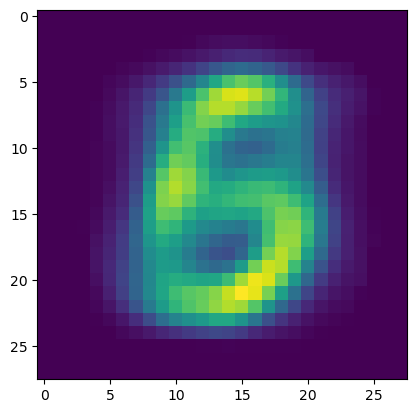

In [85]:
gen=model.dec(torch.randn(10))
plt.imshow(gen.detach().cpu().numpy().reshape(28,28))

In [35]:
required = torch.randn(10);

/tmp/ipykernel_5050/515443102.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tmp=torch.tensor(x)


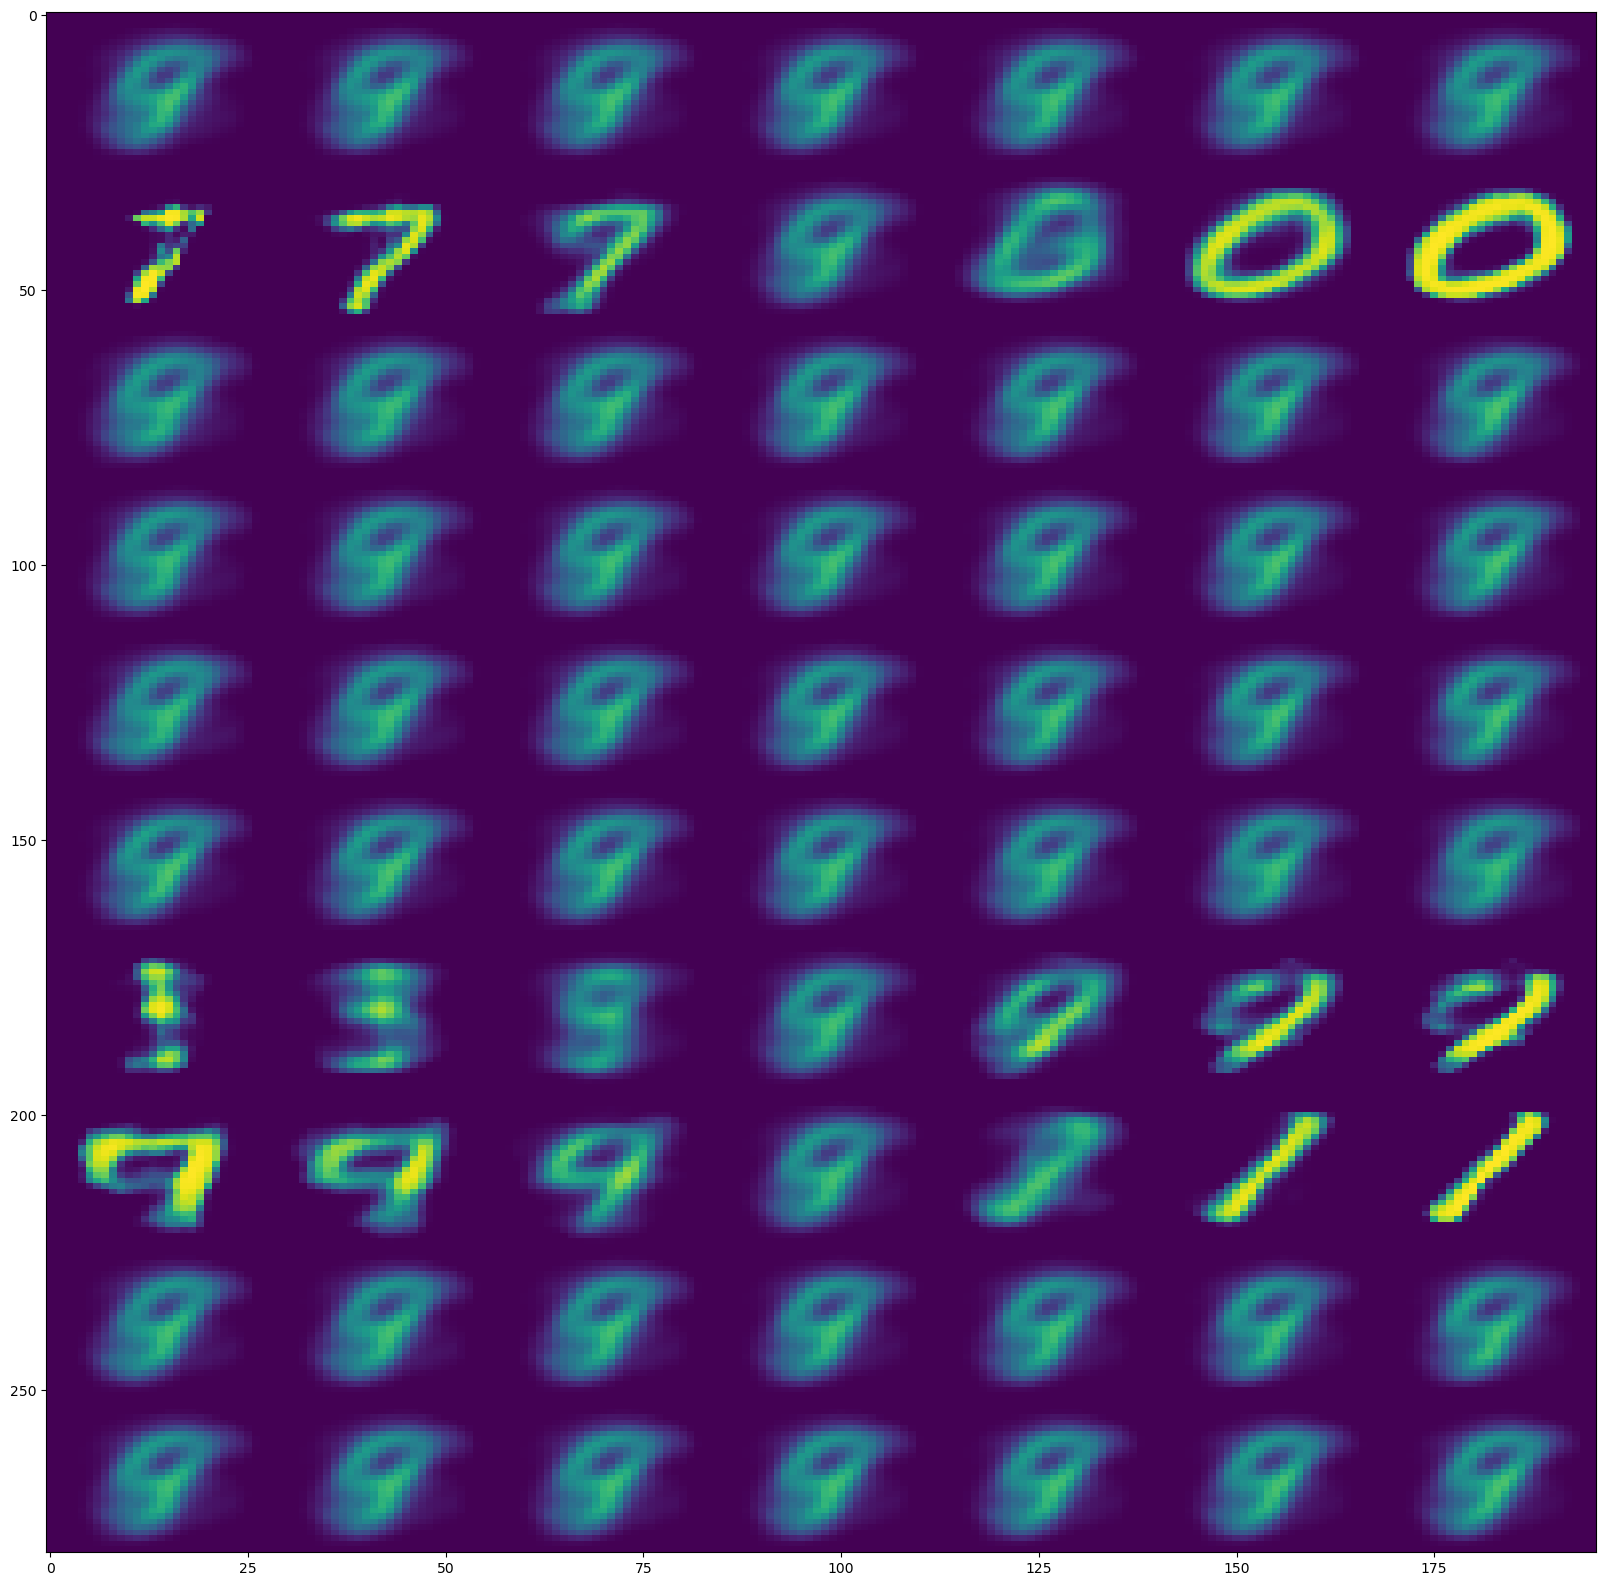

In [37]:
def chaapkadada(x, start):
    h = 10
    w = 7
    img = np.zeros((h*28, w*28))
    for i in range(10):
        tmp=torch.tensor(x)
        tmp[i+start]-=4
        for j in range(7):
            tmp[i+start]+=1
            x_hat = model.dec(tmp)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[i*28:(i+1)*28, j*28:(j+1)*28] = x_hat
    plt.figure(figsize=(20, 20))
    plt.imshow(img, aspect='auto')
    
    
for i in range(0,10,10):
    chaapkadada(required, i)